In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Online Sales Data.csv')

In [ ]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [ ]:
df.isna().values.any()

np.False_

In [ ]:
# Select features and target
X = df[["Units Sold"]].values #feature
y = df["Total Revenue"].values #target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 154730.9317676859
R-squared: 0.037855479697456396


In [ ]:
# Group by Product Name and sum Units Sold
top_products_by_units = df.groupby('Product Name')['Units Sold'].sum().reset_index()

In [ ]:
# Sort in descending order to get top products
top_products_by_units = top_products_by_units.sort_values(by='Units Sold', ascending=False)

In [ ]:
# Display the top 10 products by units sold
print("Top 10 Products by Units Sold:\n")
print(top_products_by_units.head(10).to_markdown(index=False, numalign="left", stralign="left"))

Top 10 Products by Units Sold:

| Product Name                            | Units Sold   |
|:----------------------------------------|:-------------|
| Hanes ComfortSoft T-Shirt               | 10           |
| The Catcher in the Rye by J.D. Salinger | 7            |
| Nike Air Force 1                        | 6            |
| Gap Essential Crewneck T-Shirt          | 6            |
| Yeti Rambler Tumbler                    | 6            |
| Spalding NBA Street Basketball          | 6            |
| Adidas 3-Stripes Shorts                 | 5            |
| Calvin Klein Boxer Briefs               | 5            |
| Titleist Pro V1 Golf Balls              | 5            |
| Under Armour HeatGear T-Shirt           | 5            |


In [ ]:
# Group by Product Name and sum Total Revenue
top_products_by_revenue = df.groupby('Product Name')['Total Revenue'].sum().reset_index()

# Sort in descending order to get top products by revenue
top_products_by_revenue = top_products_by_revenue.sort_values(by='Total Revenue', ascending=False)

# Display the top 10 products by total revenue
print("\nTop 10 Products by Total Revenue:\n")
print(top_products_by_revenue.head(10).to_markdown(index=False, numalign="left", stralign="left"))


Top 10 Products by Total Revenue:

| Product Name                      | Total Revenue   |
|:----------------------------------|:----------------|
| Canon EOS R5 Camera               | 3899.99         |
| LG OLED TV                        | 2599.98         |
| MacBook Pro 16-inch               | 2499.99         |
| Apple MacBook Pro 16-inch         | 2399            |
| iPhone 14 Pro                     | 1999.98         |
| Peloton Bike                      | 1895            |
| HP Spectre x360 Laptop            | 1599.99         |
| Roomba i7+                        | 1599.98         |
| Garmin Forerunner 945             | 1599.97         |
| Samsung Odyssey G9 Gaming Monitor | 1499.99         |


In [ ]:
import altair as alt
alt.renderers.enable('default')

# Group by Product Category and sum Total Revenue
top_categories_by_revenue = df.groupby('Product Category')['Total Revenue'].sum().reset_index()

# Sort in descending order
top_categories_by_revenue = top_categories_by_revenue.sort_values(by='Total Revenue', ascending=False)

# Display the top product categories by total revenue
print("\nTop Product Categories by Total Revenue:\n")
print(top_categories_by_revenue.to_markdown(index=False, numalign="left", stralign="left"))

# Optional: Visualize top product categories by revenue
chart_categories = alt.Chart(top_categories_by_revenue).mark_bar().encode(
    x=alt.X('Total Revenue', title='Total Revenue', axis=alt.Axis(format='$.2s')),
    y=alt.Y('Product Category', sort='-x', title='Product Category'),
    tooltip=['Product Category', alt.Tooltip('Total Revenue', format='$.2f')]
).properties(
    title='Total Revenue by Product Category',
    width=600,   # adjust width as you like
    height=400   # adjust height as you like
).interactive()





Top Product Categories by Total Revenue:

| Product Category   | Total Revenue   |
|:-------------------|:----------------|
| Electronics        | 34982.4         |
| Home Appliances    | 18646.2         |
| Sports             | 14326.5         |
| Clothing           | 8128.93         |
| Beauty Products    | 2621.9          |
| Books              | 1861.93         |


In [ ]:
# Display the chart in Colab
chart_categories

alt.Chart(...)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df_trend = df.groupby(df['Date'].dt.to_period('M'))['Total Revenue'].sum().reset_index()
df_trend['Date'] = df_trend['Date'].dt.to_timestamp()

alt.Chart(df_trend).mark_line(point=True).encode(
    x='Date',
    y='Total Revenue',
    tooltip=['Date', 'Total Revenue']
).properties(
    title='Monthly Revenue Trend',
    width=800,
    height=400
)


alt.Chart(...)

<Axes: ylabel='Region'>

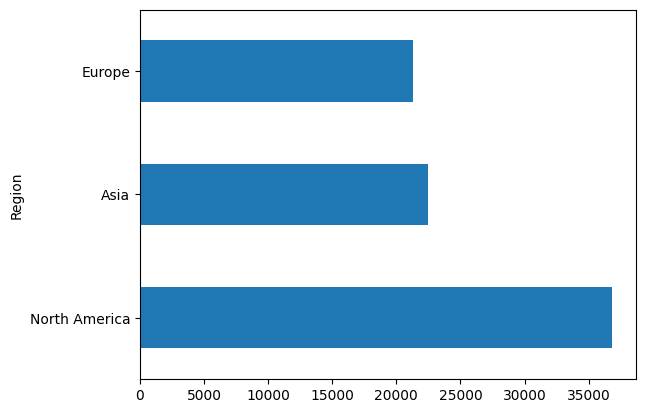

In [ ]:
df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False).plot(kind='barh')


In [ ]:
alt.Chart(df).mark_circle(size=60).encode(
    x='Units Sold',
    y='Total Revenue',
    color='Product Category',
    tooltip=['Product Name', 'Units Sold', 'Total Revenue']
).properties(
    title='Units Sold vs Total Revenue',
    width=700,
    height=500
).interactive()


alt.Chart(...)

<Axes: ylabel='Total Revenue'>

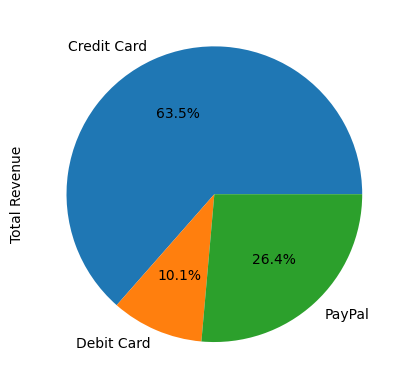

In [ ]:
df.groupby('Payment Method')['Total Revenue'].sum().plot(kind='pie', autopct='%1.1f%%')


<Axes: ylabel='Frequency'>

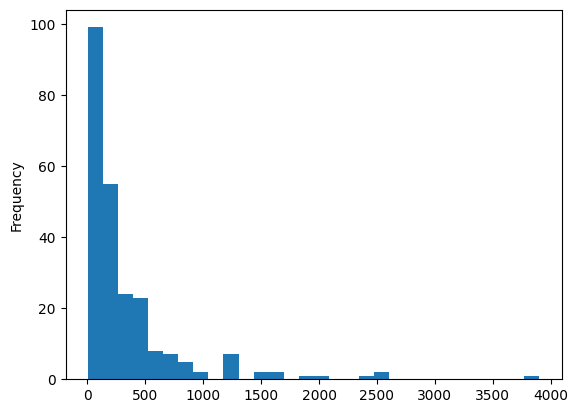

In [ ]:
df['Total Revenue'].plot(kind='hist', bins=30)

In [ ]:
alt.Chart(df).mark_boxplot().encode(
    x='Product Category',
    y='Total Revenue'
)


alt.Chart(...)